In [1]:
%matplotlib inline
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
avisos_detalles = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
postulaciones = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_4_postulaciones.csv')
postulantes_educacion = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

# Ahora que ya vimos el nivel de estudio de los postulantes vamos a ver como se relacionan estos datos con los anuncios a los que se postulan

### Filtro los id repetidos

In [4]:
postulantes_educacion['nombre'] = postulantes_educacion['nombre'].astype('string')

In [5]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))

def eliminar_tildes_dict(keys):
    kdict = {}
    for k in keys:
        kdict[k] = elimina_tildes(k.decode('utf-8'))
    
    return kdict

In [6]:
postulantes_educacion['nombre'] = postulantes_educacion['nombre'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

In [7]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre'] + ' - ' + postulantes_educacion['estado']

In [8]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre-estado'].astype('category')

In [9]:
categories_order = ['Otro - Abandonado',
 'Otro - En Curso',                                        
 'Otro - Graduado', 
'Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado',
 'Terciario/Tecnico - Abandonado',
 'Terciario/Tecnico - En Curso',
 'Terciario/Tecnico - Graduado',
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado',
'Posgrado - Abandonado',
 'Posgrado - En Curso',
 'Posgrado - Graduado',
 'Master - Abandonado',
 'Master - En Curso',
 'Master - Graduado',
'Doctorado - Abandonado',
 'Doctorado - En Curso',
 'Doctorado - Graduado']

In [10]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre-estado'].cat.set_categories(categories_order, ordered = True)

In [11]:
postulantes_educacion = postulantes_educacion.sort_values('nombre-estado', ascending= False).drop_duplicates(subset='idpostulante', keep = 'first')

In [12]:
postulantes_educacion['nombre-estado'].value_counts().index

CategoricalIndex([u'Secundario - Graduado', u'Universitario - En Curso',
                  u'Universitario - Graduado', u'Terciario/Tecnico - Graduado',
                  u'Universitario - Abandonado',
                  u'Terciario/Tecnico - En Curso', u'Posgrado - Graduado',
                  u'Secundario - En Curso', u'Terciario/Tecnico - Abandonado',
                  u'Secundario - Abandonado', u'Master - Graduado',
                  u'Posgrado - En Curso', u'Master - En Curso',
                  u'Otro - Graduado', u'Posgrado - Abandonado',
                  u'Otro - Abandonado', u'Otro - En Curso',
                  u'Master - Abandonado', u'Doctorado - Graduado',
                  u'Doctorado - En Curso', u'Doctorado - Abandonado'],
                 categories=[u'Otro - Abandonado', u'Otro - En Curso', u'Otro - Graduado', u'Secundario - Abandonado', u'Secundario - En Curso', u'Secundario - Graduado', u'Terciario/Tecnico - Abandonado', u'Terciario/Tecnico - En Curso', ...], order

In [13]:
postulantes_educacion = postulantes_educacion.sort_values('nombre-estado', ascending= False).drop_duplicates(subset='idpostulante', keep = 'first')

In [14]:
postulantes_educacion = postulantes_educacion.loc[:,['idpostulante', 'nombre-estado']]

### Miro los datos de los sets para ver como unirlos

In [15]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188752 entries, 71054 to 281618
Data columns (total 2 columns):
idpostulante     188752 non-null object
nombre-estado    188752 non-null category
dtypes: category(1), object(1)
memory usage: 3.1+ MB


In [16]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [17]:
postulaciones['idaviso'].value_counts().head()

1112033906    9932
1112334791    9787
1112204682    9244
1112094756    8763
1112345900    8304
Name: idaviso, dtype: int64

In [18]:
postulaciones['idpostulante'].value_counts().head()

axmjOE     3166
6rQdqjl    1773
5Mwjak     1485
8MaQjP3    1414
4rNzLje    1213
Name: idpostulante, dtype: int64

In [19]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


Vamos a agarrar el set de datos de postulaciones y lo vamos a unir con el tipo de educacion de cada postulante

In [15]:
postulaciones = pd.merge(postulaciones, postulantes_educacion, on='idpostulante', how = 'left')

In [16]:
postulantes_educacion = 0

Secundario - Graduado             969281
Universitario - En Curso          894742
Universitario - Graduado          548303
Terciario/Tecnico - Graduado      235453
Universitario - Abandonado        178232
Terciario/Tecnico - En Curso      169220
Posgrado - Graduado                65212
Terciario/Tecnico - Abandonado     48329
Secundario - En Curso              48230
Secundario - Abandonado            35227
Master - Graduado                  30875
Posgrado - En Curso                26221
Master - En Curso                  22728
Otro - Graduado                    12395
Posgrado - Abandonado               4508
Master - Abandonado                 2544
Otro - Abandonado                   2517
Otro - En Curso                     2195
Doctorado - En Curso                1748
Doctorado - Graduado                1455
Doctorado - Abandonado               314
Name: nombre-estado, dtype: int64

Y ahora le vamos a agregar los datos de cada aviso

In [17]:
avisos_detalles = avisos_detalles.loc[:,['idaviso', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area', 'denominacion_empresa']]

In [18]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 5 columns):
idaviso                 13534 non-null int64
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(1), object(4)
memory usage: 528.7+ KB


Elimino tildes así despues no tengo que estar luchando con eso

In [19]:
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].astype('string')
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].astype('string')
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].astype('string')
avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

avisos_detalles['denominacion_empresa'] = avisos_detalles['denominacion_empresa'].astype('string')
avisos_detalles['denominacion_empresa'] = avisos_detalles['denominacion_empresa'].apply(lambda x: elimina_tildes(x.decode('utf-8')))


In [20]:
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].astype('category')
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].astype('category')
avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].astype('category')

In [26]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 5 columns):
idaviso                 13534 non-null int64
tipo_de_trabajo         13534 non-null category
nivel_laboral           13534 non-null category
nombre_area             13534 non-null category
denominacion_empresa    13534 non-null object
dtypes: category(3), int64(1), object(1)
memory usage: 271.3+ KB


In [21]:
postulaciones = pd.merge(postulaciones, avisos_detalles, on='idaviso', how = 'left')

In [22]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401623 entries, 0 to 3401622
Data columns (total 8 columns):
idaviso                 int64
idpostulante            object
fechapostulacion        object
nombre-estado           category
tipo_de_trabajo         category
nivel_laboral           category
nombre_area             category
denominacion_empresa    object
dtypes: category(4), int64(1), object(3)
memory usage: 146.0+ MB


In [23]:
avisos_detalles = 0

Bueno, ahora sí comencemos el análisis

## Comienzo con un heatmap relacionando las categorías nombre-estado y tipo_de_trabajo

In [30]:
pd.crosstab(index=postulaciones['nombre-estado'],
            columns=[postulaciones['tipo_de_trabajo']], margins=True)

tipo_de_trabajo,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario,All
nombre-estado,,,,,,,,,,
Otro - Abandonado,4,1980,114,1,1,38,0,0,8,2146
Otro - En Curso,3,1682,203,2,3,18,0,2,10,1923
Otro - Graduado,10,9535,998,16,15,86,0,13,47,10720
Secundario - Abandonado,26,28175,1731,9,41,387,2,18,105,30494
Secundario - En Curso,64,36388,5209,71,37,439,2,45,128,42383
Secundario - Graduado,585,743740,111323,976,785,4956,21,861,3248,866495
Terciario/Tecnico - Abandonado,23,37598,5843,47,62,142,0,55,112,43882
Terciario/Tecnico - En Curso,107,124640,26722,502,144,560,6,194,433,153308
Terciario/Tecnico - Graduado,166,185040,26000,522,239,774,10,261,722,213734


In [106]:
ind = postulaciones['nombre-estado']
cols = [postulaciones['tipo_de_trabajo']]

table = pd.crosstab(index= ind,columns= cols, margins=True, normalize = 'columns')

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [31]:
import seaborn as sns

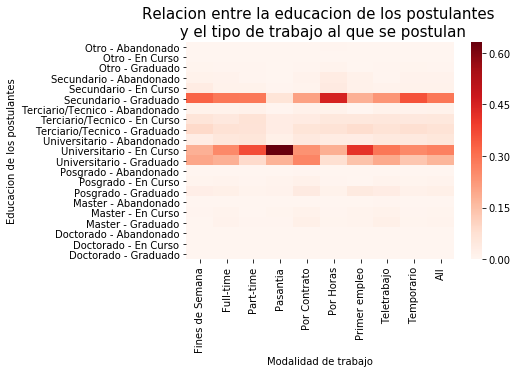

In [62]:
ax = plt.axes()
ind = postulaciones['nombre-estado']
data = pd.crosstab(index= ind,
            columns=[postulaciones['tipo_de_trabajo']], margins=True, normalize = 'columns')
sns.heatmap(data, cmap = 'Reds')
ax.set_title('Relacion entre la educacion de los postulantes \n y el tipo de trabajo al que se postulan', size = 15)
ax.set_ylabel('Educacion de los postulantes')
ax.set_xlabel('Modalidad de trabajo')

La vizualización no es muy clara, pero si se nota la innegable relación entre las pasantías y primer empleo y los postulantes con nivel universitario en curso. Sin embargo, al haber pocos de algunos niveles de estudio en comparacion con otros se hace dificil la lectura del heatmap

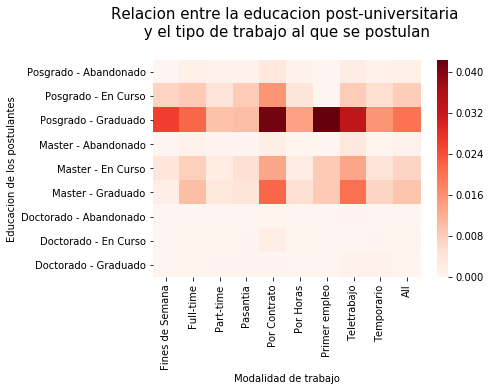

In [108]:
ax = plt.axes()
sns.heatmap( table.loc[[#'Otro - Abandonado',
 #'Otro - En Curso',                                        
 #'Otro - Graduado', 
# 'Terciario/Tecnico - Abandonado',
 #'Terciario/Tecnico - En Curso',
 #'Terciario/Tecnico - Graduado',
 'Posgrado - Abandonado',
 'Posgrado - En Curso',
 'Posgrado - Graduado',
 'Master - Abandonado',
 'Master - En Curso',
 'Master - Graduado',
'Doctorado - Abandonado',
 'Doctorado - En Curso',
 'Doctorado - Graduado'],:], cmap = 'Reds')
ax.set_title('Relacion entre la educacion post-universitaria \n y el tipo de trabajo al que se postulan \n', size = 15)
ax.set_ylabel('Educacion de los postulantes')
ax.set_xlabel('Modalidad de trabajo')

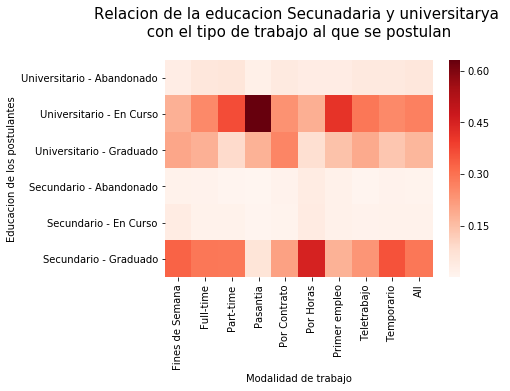

In [109]:
ax = plt.axes()
sns.heatmap( table.loc[[
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado','Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado'],:], cmap = 'Reds')
ax.set_title('Relacion de la educacion Secunadaria y universitarya \n con el tipo de trabajo al que se postulan \n', size = 15)
ax.set_ylabel('Educacion de los postulantes')
ax.set_xlabel('Modalidad de trabajo')

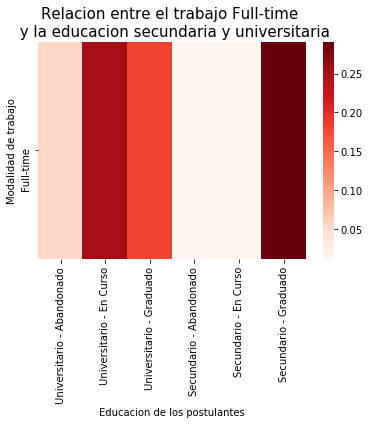

In [91]:
ax = plt.axes()
sns.heatmap(table.loc[['Full-time'],[
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado','Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado']],cmap = 'Reds')
ax.set_title('Relacion entre el trabajo Full-time \n y la educacion secundaria y universitaria', size = 15)
ax.set_xlabel('Educacion de los postulantes')
ax.set_ylabel('Modalidad de trabajo')

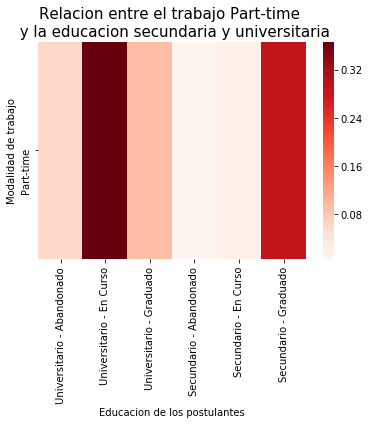

In [92]:
ax = plt.axes()
sns.heatmap(table.loc[['Part-time'],[
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado','Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado']],cmap = 'Reds')
ax.set_title('Relacion entre el trabajo Part-time \n y la educacion secundaria y universitaria', size = 15)
ax.set_xlabel('Educacion de los postulantes')
ax.set_ylabel('Modalidad de trabajo')

## Relacionamos ahora las categorías nombre-estado y nivel laboral

In [27]:
import seaborn as sns

In [29]:
ind = postulaciones['nombre-estado']
cols = [postulaciones['nivel_laboral']]

table = pd.crosstab(index= ind,columns= cols, margins=True, normalize = 'index')

In [25]:
pd.crosstab(index= ind,columns= cols, margins=True)

nivel_laboral,Gerencia / Alta Gerencia / Direccion,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior,All
nombre-estado,,,,,,
Otro - Abandonado,7,15,399,305,1420,2146
Otro - En Curso,2,20,371,225,1305,1923
Otro - Graduado,33,158,2020,1315,7194,10720
Secundario - Abandonado,47,393,5543,4140,20371,30494
Secundario - En Curso,88,478,8813,5216,27788,42383
Secundario - Graduado,2556,12971,179511,94924,576533,866495
Terciario/Tecnico - Abandonado,286,1076,9223,4059,29238,43882
Terciario/Tecnico - En Curso,518,2336,37361,13897,99196,153308
Terciario/Tecnico - Graduado,1336,5485,45759,17916,143238,213734


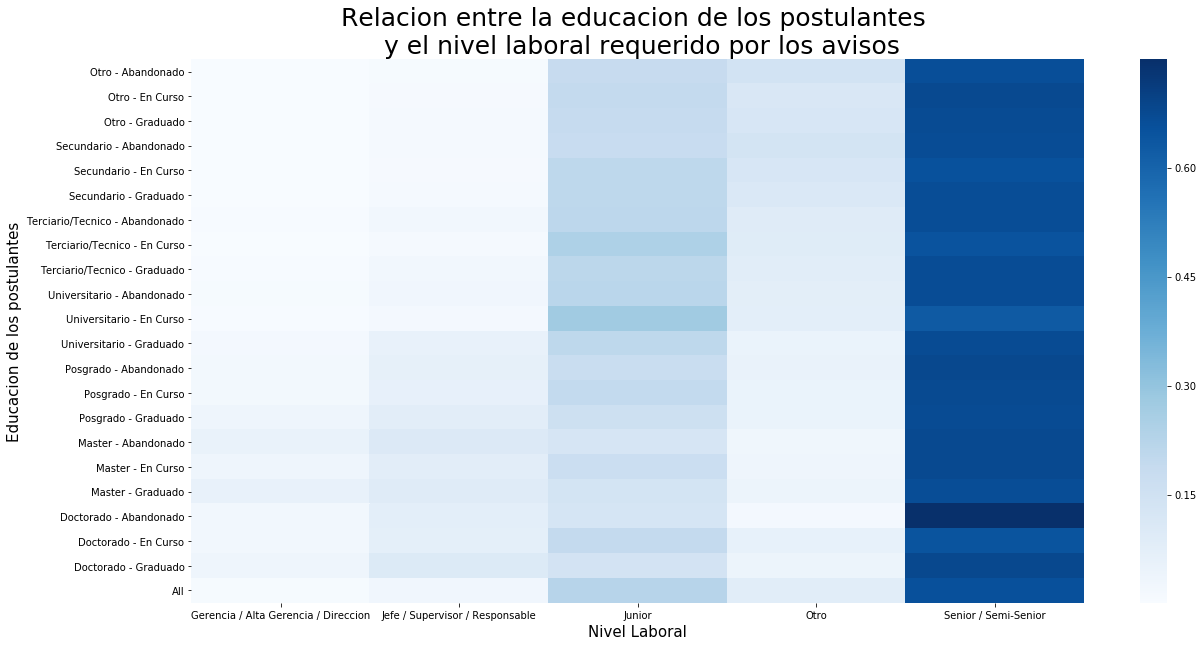

In [38]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(table ,cmap = 'Blues')
ax.set_title('Relacion entre la educacion de los postulantes \n y el nivel laboral requerido por los avisos', size = 25)
ax.set_ylabel('Educacion de los postulantes', size = 15)
ax.set_xlabel('Nivel Laboral', size= 15)

## Relacionamos ahora las categorías nombre-estado y  el area

In [49]:
postulaciones['nombre_area'].value_counts().head(10).index

CategoricalIndex([u'Ventas', u'Administracion', u'Produccion', u'Comercial',
                  u'Atencion al Cliente', u'Recepcionista', u'Call Center',
                  u'Telemarketing', u'Tesoreria', u'Mantenimiento y Limpieza'],
                 categories=[u'Abastecimiento', u'Administracion', u'Administracion de Base de Datos', u'Administracion de Personal', u'Administracion de Seguros', u'Almacen / Deposito / Expedicion', u'Analisis Funcional', u'Analisis de Riesgos', ...], ordered=False, dtype='category')

In [54]:
ind = postulaciones['nombre-estado']
cols = postulaciones['nombre_area']
table = pd.crosstab(index= ind,columns= [cols], 
                    margins=True, normalize = 'index')

In [55]:
pd.crosstab(index= ind,columns= cols, margins=True)

nombre_area,Abastecimiento,Administracion,Administracion de Base de Datos,Administracion de Personal,Administracion de Seguros,Almacen / Deposito / Expedicion,Analisis Funcional,Analisis de Riesgos,Apoderado Aduanal,Arquitectura,...,Topografia,Trabajo Social,Transporte,Turismo,Urbanismo,Venta de Seguros,Ventas,Ventas Internacionales/Exportacion,Veterinaria,All
nombre-estado,,,,,,,,,,,,,,,,,,,,,
Otro - Abandonado,7,53,0,51,0,72,0,0,0,0,...,0,0,83,3,0,1,141,0,0,2146
Otro - En Curso,7,95,0,32,2,42,3,1,0,5,...,0,0,22,0,0,0,237,3,0,1923
Otro - Graduado,35,434,0,146,13,263,8,5,1,3,...,0,0,205,9,0,15,1109,4,2,10720
Secundario - Abandonado,179,573,0,438,10,1424,5,4,0,6,...,0,1,981,12,0,4,2698,17,0,30494
Secundario - En Curso,296,986,0,607,14,1524,17,9,5,18,...,0,2,597,33,0,15,6521,26,2,42383
Secundario - Graduado,4819,49575,75,7266,730,27435,375,296,59,357,...,0,30,9539,618,2,728,144349,605,10,866495
Terciario/Tecnico - Abandonado,177,4443,6,357,83,905,31,35,2,48,...,0,3,320,64,0,63,7992,46,1,43882
Terciario/Tecnico - En Curso,506,16030,33,1632,255,2258,293,158,34,89,...,0,5,630,253,0,195,25095,388,2,153308
Terciario/Tecnico - Graduado,700,22100,24,2549,349,3394,390,180,74,184,...,0,4,1037,424,2,274,30846,631,18,213734


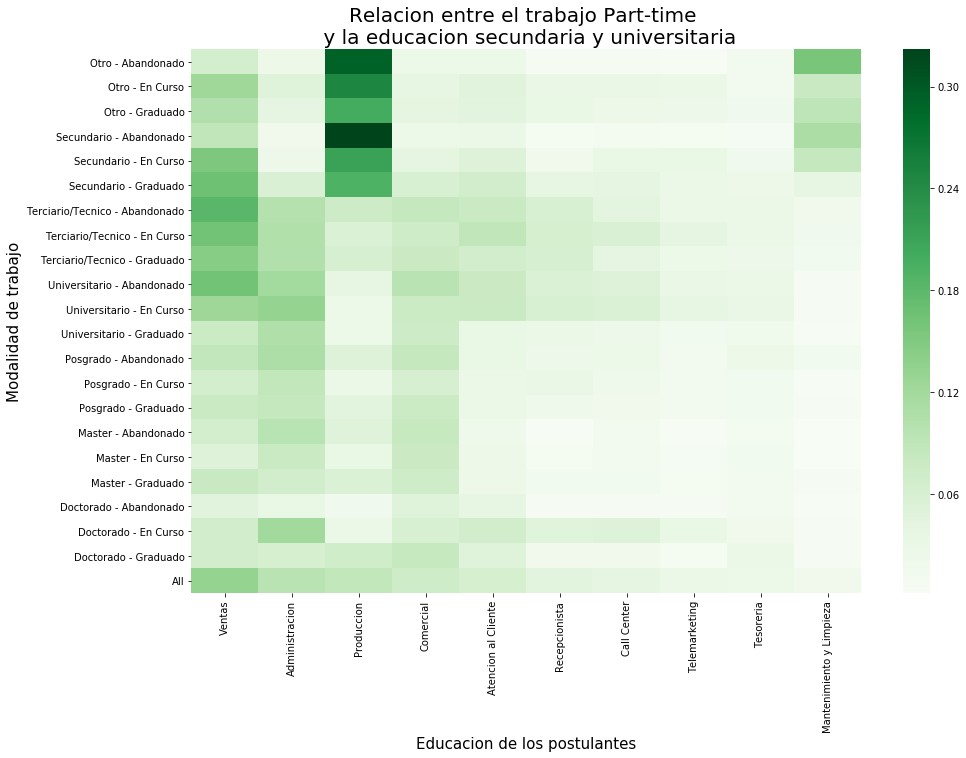

In [61]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(table.loc[:,[u'Ventas', u'Administracion', u'Produccion', u'Comercial',
                  u'Atencion al Cliente', u'Recepcionista', u'Call Center',
                  u'Telemarketing', u'Tesoreria', u'Mantenimiento y Limpieza']],cmap = 'Greens')
ax.set_title('Relacion entre el trabajo Part-time \n y la educacion secundaria y universitaria', size = 20)
ax.set_xlabel('Educacion de los postulantes', size = 15)
ax.set_ylabel('Modalidad de trabajo', size = 15)